In [1]:
from typing import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.tools import tool

from langgraph.prebuilt import ToolNode, tools_condition
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing_extensions import Annotated

load_dotenv()

True

In [2]:
class State(TypedDict):
    message:Annotated[list,add_messages]

In [3]:
@tool(description="returning the stock price")
def get_stock_price(symbol: str) -> float:
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol, 0.0)

tools = [get_stock_price]

llm = init_chat_model("google_genai:gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

In [4]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node(chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot")
builder.add_conditional_edges("chatbot", tools_condition)
builder.add_edge("tools", "chatbot")
graph = builder.compile()


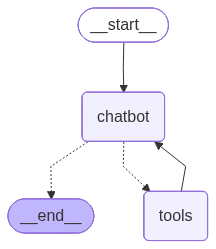

In [5]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))